### Team:
* Andrey Filin
* Dmitrii Kornienko
* Svetlana Lukina
* Oleg Rakhmatullin
* Lyudmila Zavadskaya

### Important implementation details

1. You must write your own image transformation functions without relying on existing tools such as OpenCV or similar. **The allowed exceptions are:**
    - routines to load image from file,
    - conversion RGB images to grayscale and vice versa,
    - conversion of image data type (e.g., int to float),
    - threshold filtering,
    - convolution routine,
    - Canny edge detector.
1. Numpy arrays (`ndarray` type) with shape (height, width, 3) should be used to represent RGB images.
1. Please try to respect existing folder structure, but feel free to create new subfolders as needed:
    - `data/dataset-n` folder should contain images of n-th captured dataset

### General imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt  # You may use different plotting engine
import numpy as np
from PIL import Image
import cv2

In [3]:
def scale(data):
    return (data-data.min())/(data.max()-data.min())

In [4]:
path_to_images = "data/"
path_to_images1 = "data/dataset-1/"
path_to_images2 = "data/dataset-2/"
path_to_images3 = "data/dataset-3/"

### Auxiliary functions

In [5]:
from skimage.color import rgb2gray

def rgb_to_gray(image):
    if image.ndim == 2: 
        return image
    return rgb2gray(image)

def render_images(cont: dict, bw:bool=False) -> None:
    """Render previously loaded images from container

    Args:
        cont: container with images
    """

    # TODO: Develop function to visualize images inside notebook.
    # Notes:
    #  - Make sure to have a descriptive caption for each image
    #  - Function does not return any value, only renders images
    
    if len(cont) == 1:
      for name, img in cont.items():
        if bw:
            plt.imshow(rgb_to_gray(img), cmap='gray')
        else:
            plt.imshow(img)
        plt.title(name)
        plt.show()
      return

    _, axes = plt.subplots(1, len(cont), figsize=(15, 5))
    for i, (name, img) in enumerate(cont.items()):
        if bw:
            axes[i].imshow(rgb_to_gray(img), cmap='gray')
        else:
            axes[i].imshow(img)
        axes[i].set_title(name)

    plt.tight_layout()
    plt.show()


In [6]:
def load_images(names: list, render:bool=True, path_to_images:str=path_to_images) -> dict:
    """Loads images from files and store them as container of numpy arrays

    Args:
        names: list of image files to load
        render: flag that defines if image should be rendered (visualized inside notebook)

    Returns:
        Container with loaded images
    """

    # TODO: Develop function to load images from files into container
    # Notes:
    #   - You can use any container for images that you want (e.g., list, dictionary, etc.)
    #   - Store images as numpy array (ndarray type) with shape (height, width, 3)

    images = {}
    for name in names:
        img = Image.open(path_to_images + name)
        img_array = np.array(img)

        images[str(name)] = img_array

    if render:
        render_images(images)

    return images

## 1 Depth edge detector using multi-flash Imaging

### 1.1 Preparation of dataset

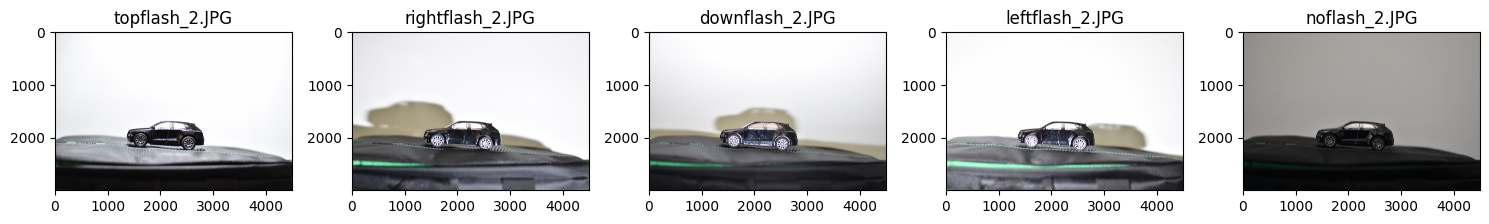

In [14]:
# TODO: Load images of each object into separate container and render them
# Expected output: 5 color images per dataset, 3 datasets in total

images_paths1 = [
    'topflash_1.JPG',
    'rightflash_1.JPG',
    'downflash_1.JPG',
    'leftflash_1.JPG',
    'noflash_1.JPG'
]
images_paths2 = [
    'topflash_2.JPG',
    'rightflash_2.JPG',
    'downflash_2.JPG',
    'leftflash_2.JPG',
    'noflash_2.JPG'
]
images_paths3 = [
    'topflash_3.JPG',
    'rightflash_3.JPG',
    'downflash_3.JPG',
    'leftflash_3.JPG',
    'noflash_3.JPG'
]
#images_1 = load_images(images_paths1, render=True, path_to_images=path_to_images1)

images_2 = load_images(images_paths2, render=True, path_to_images=path_to_images2)

#images_3 = load_images(images_paths3, render=True, path_to_images=path_to_images3)

### 1.2 Processing of acquired dataset

In [29]:
# TODO: Select one dataset to test functions of depth edge detector pipeline during development
# >> first object

In [8]:
def convert_to_grayscale(cont, render=False, save=False, path_to_save = "data/"):
    """Returns a container with grayscale images converted from RGB images

    Args:
        cont: container with RBG illuminated and ambient images

    Returns:
        Container with grayscale images
    """

    # TODO: Develop function to convert images to grayscale and return them as a new container = {}
    result = {}
    for name, img in cont.items():
        converted = rgb_to_gray(img)
        result[name + " bw"] = converted
        if save:
            plt.imsave(f'{path_to_save}{name[:-4]}_bw.jpg', converted, cmap='gray')

    if render:
        render_images(result)

    return result

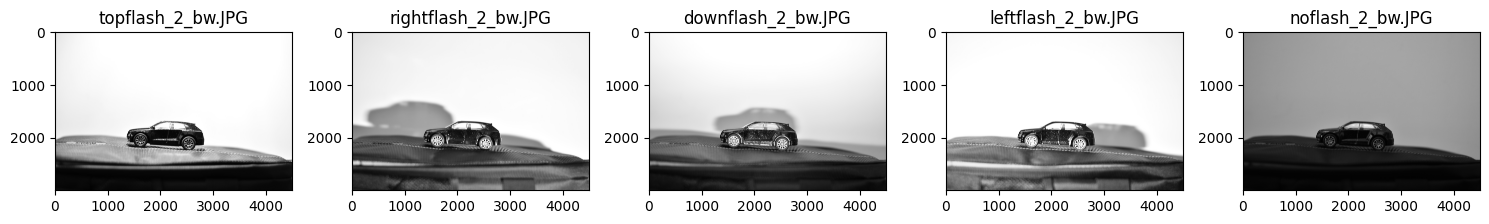

In [15]:
# TODO: Convert images to grayscale and render result
# Expected output: 5 grayscale images in total
#images_1_bw = convert_to_grayscale(images_1, render=False, save=True, path_to_save=path_to_images1)
images_2_bw = convert_to_grayscale(images_2, render=False, save=True, path_to_save=path_to_images2)
#images_3_bw = convert_to_grayscale(images_3, render=False, save=True, path_to_save=path_to_images3)

#images_1_bw = load_images([name[:-4]+"_bw.JPG" for name in images_paths1], render=True, path_to_images=path_to_images1)
images_2_bw = load_images([name[:-4]+"_bw.JPG" for name in images_paths2], render=True, path_to_images=path_to_images2)
#images_3_bw = load_images([name[:-4]+"_bw.JPG" for name in images_paths3], render=True, path_to_images=path_to_images3)

In [10]:
def find_ambient(cont):
    for name, img in cont.items():
        if 'noflash' in name:
            return img
    return None

def substract_ambient(cont, render=False):
    """Returns container with images of difference between an illuminated images and the ambient one

    Args:
        cont: container with grayscale illuminated and ambient images

    Returns:
        Container with images of calculated difference
    """

    # TODO: Develop function to calculate images of difference and return them as a new container
    # Notes:
    #   - Keep in mind that intensity of pixels is strictly non-negative

    ambient = find_ambient(cont)

    result = {}
    for name, img in cont.items():
        if 'noflash' not in name:
            result[name + " diff with ambient"] = cv2.subtract(img, ambient)
    
    if render:
        render_images(result)

    return result

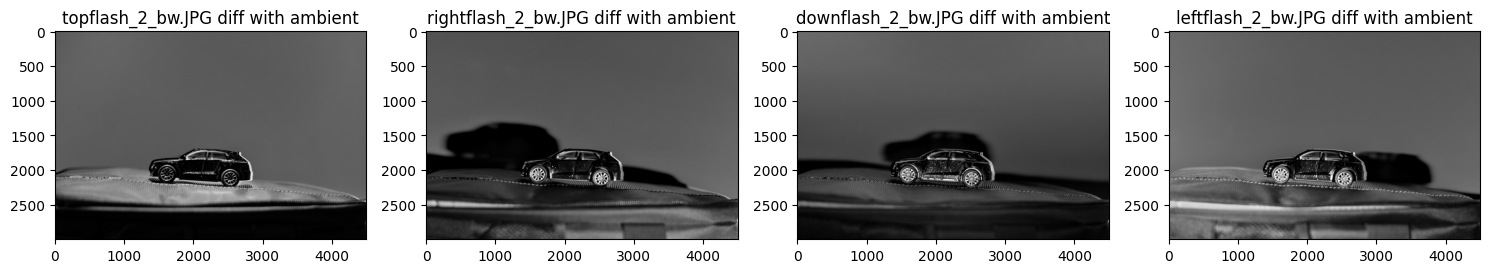

In [16]:
# TODO: Get images of difference between an illuminated images and the ambient one and render result
# Expected output: 4 grayscale images in total

#images_1_diff = substract_ambient(images_1_bw, render=True)
images_2_diff = substract_ambient(images_2_bw, render=True)
#images_3_diff = substract_ambient(images_3_bw, render=True)

In [12]:
def get_max_intensity_image(cont):
    """Returns image where each pixel has maximum intensity over corresponding pixels of all images in container

    Args:
        cont: container with images

    Returns:
        Image with maximum intensity of pixels
    """

    # TODO: Develop function to get maximum intensity image
    return np.max(np.stack(list(cont.values()), axis=0), axis=0)

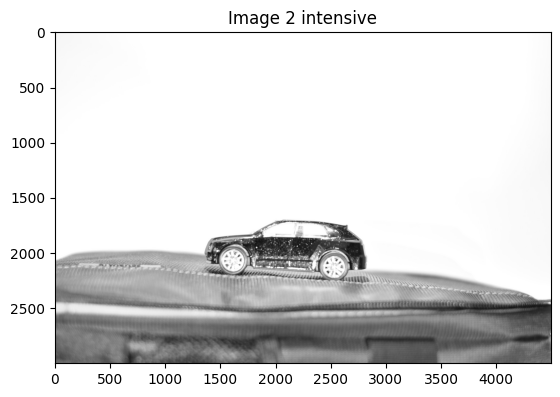

In [17]:
# TODO: Calculate and render maximum intensity image
# Expected output: 1 grayscale image in total
#images_1_intensive = get_max_intensity_image(images_1_bw)
images_2_intensive = get_max_intensity_image(images_2_bw)
#images_3_intensive = get_max_intensity_image(images_3_bw)

render_images({
    #"Image 1 intensive": images_1_intensive,
    "Image 2 intensive": images_2_intensive,
    #"Image 3 intensive": images_3_intensive,
})

In [19]:
def get_ratios(cont, mx):
    """Returns container with ratio between an images of difference and the maximum intensity image

    Args:
        cont: container with images of difference between an illuminated images and the ambient one
        mx: image with maximum intensity of pixel over all images of container

    Returns:
        Container with images of calculated ratios
    """
    
    # TODO: Develop function to calculate images with ratio and return them as a new container
    # Notes:
    #   - Pay attention to values of zero intensity in denominator and data types of images

    result = {}

    for name, img in cont.items():
        res = (img.astype(float)/mx.astype(float))
        res[np.isinf(res)] = 1
        
        res = np.clip(res, 0, 1000000)

        result[name + " ratio"] = res.copy()

    return result

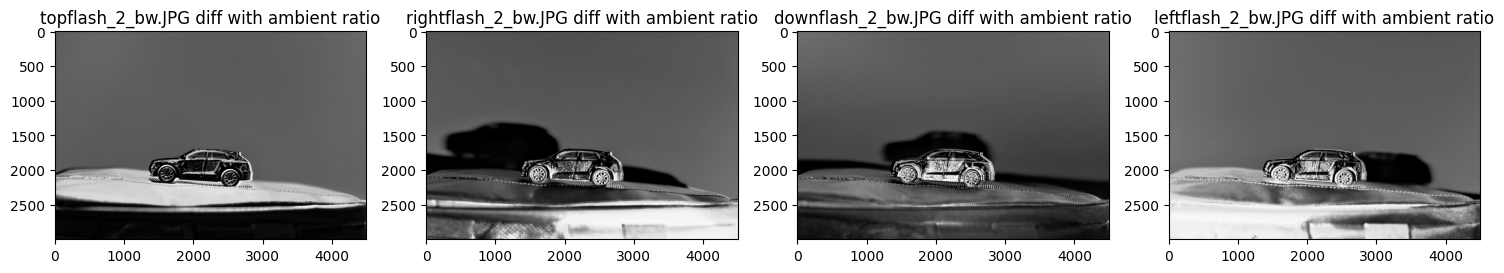

In [20]:
# TODO: Calculate and render images with ratio between an images of difference and the maximum intensity image
# Expected output: 4 grayscale images in total

#image_1_ratio = get_ratios(images_1_diff, images_1_intensive)
image_2_ratio = get_ratios(images_2_diff, images_2_intensive)
#image_3_ratio = get_ratios(images_3_diff, images_3_intensive)

#render_images(image_1_ratio)
render_images(image_2_ratio)
#render_images(image_3_ratio)

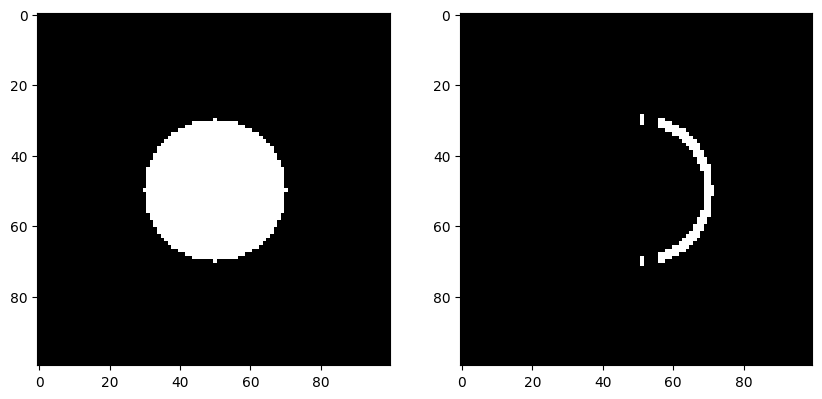

In [140]:
test_image = np.zeros((100, 100), dtype=np.uint8)  
cv2.circle(test_image, (50, 50), 20, (255), -1) 
scharr_kernel_left = np.array(
                         [[ 3,  0, -3],
                          [10,  0, -10],
                          [ 3,  0, -3]])

gradient_image = cv2.filter2D(test_image, -1, scharr_kernel_left)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(gradient_image, cmap='gray')
plt.show()

In [21]:
from scipy.signal import convolve2d
from skimage.exposure import rescale_intensity
def get_gradient(cont, dirs):
    """Returns gradient of the images along corresponding directions usign 3x3 Scharr kernels to approximate the derivates

    Args:
        cont: container with images of calculated ratios
        dirs: container with directions that corresponds to container of images. Valid values are up, down, left, right.

    Returns:
        Container with images of calculated gradients
    """

    # TODO: Develop function to calculate gradient of the images along corresponding directions
    #       and return them as a new container
    # Notes:
    #   - It is acceptable to hardcode Scharr kernel due to specified kernel size
    #   - Ask TA for details about Scharr kernel, if you encounter some difficulties
    up_kernel = np.array([
        [ 3,  10,  3],
        [ 0,   0,  0],
        [-3, -10, -3]
    ]) / 32

    kernels = {
        'up'   :  up_kernel,
        'down' :  -1*up_kernel,
        'left' :  up_kernel.T,
        'right':  -1*(up_kernel.T)
    }

    grad = {}
    for name_orig, img in cont.items():
        name = name_orig[:name_orig.find(".JPG")] + ".JPG"
        
        grad[name] = {}
        
        if img.ndim == 3: 
            img = rgb2gray(img)

        for direction in dirs:
            grad_img = convolve2d(img.astype(float), kernels[direction].astype(float), mode='same', boundary='symm')
            grad_img = rescale_intensity(abs(grad_img))
            
            grad[name][direction] = grad_img.copy()
    return grad

In [22]:
# TODO: Get images of gradient along corresponding directions and render result
# Expected output: 4 grayscale images in total

#gradient_1 = get_gradient(image_1_ratio, ['up', 'right', 'down', 'left'])
gradient_2 = get_gradient(image_2_ratio, ['up', 'right', 'down', 'left'])
#gradient_3 = get_gradient(image_3_ratio, ['up', 'right', 'down', 'left'])



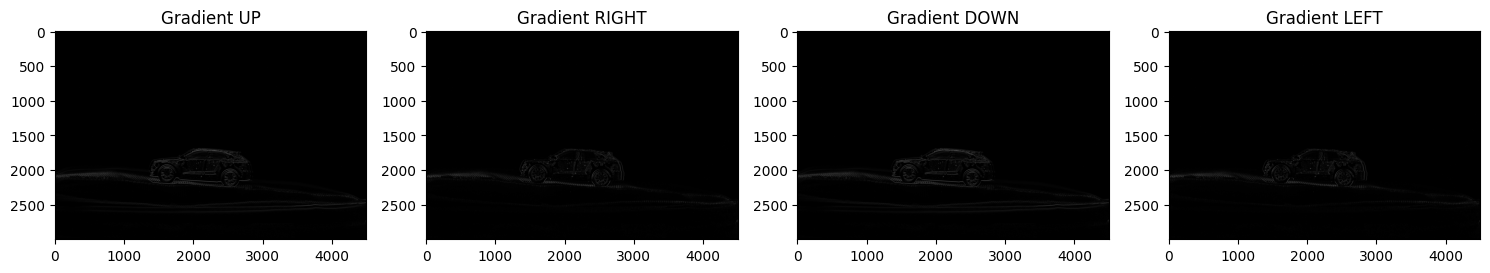

In [24]:

image_cur_name = f'topflash_2_bw.JPG'
render_images({
    "Gradient UP": gradient_2[image_cur_name]['up'],
    "Gradient RIGHT": gradient_2[image_cur_name]['right'],
    "Gradient DOWN": gradient_2[image_cur_name]['down'],
    "Gradient LEFT": gradient_2[image_cur_name]['left'],
    }, 
    bw=True)

In [25]:
def generate_edge_map(cont, sl=np.s_[:, :]):
    """Returns image of edge map of corresponding illuminated images

    Args:
        cont: container with images of gradients
        sl: slice to work with a region of the image (optional)

    Returns:
        Image with calculated edge map
    """

    # TODO: Develop function to generate edge map of corresponding illuminated images
    # Notes:
    #   - Function should result single image for entire dataset
    
    edge_maps = []

    for name, gradients in cont.items():
        if 'up' in gradients and 'down' in gradients and 'left' in gradients and 'right' in gradients:
            grad_up = gradients['up'][sl]
            grad_down = gradients['down'][sl]
            grad_left = gradients['left'][sl]
            grad_right = gradients['right'][sl]

            magnitude = np.sqrt(grad_up**2 + grad_down**2 + grad_left**2 + grad_right**2)

            edge_maps.append(magnitude)

    if edge_maps:
        final_edge_map = np.mean(edge_maps, axis=0)
        return final_edge_map
    return None


In [26]:
def overlay_edge_map(cont, edge_map, color, ambient = None):
    """Returns image with overlay of edge map rendered using selected color over ambient image

    Args:
        cont: container with RGB illuminated and ambient images
        edge_map: image of the detected edges
        color: color of overlay. Valid values are white, black, red, green, blue

    Returns:
        Image with edge map overlay
    """
    image_noflash=find_ambient(cont)
    if ambient is not None:
       image_noflash=ambient
    # TODO: Develop function to generate image with overlay of the edge map
    colors = {
        'red'   : [255, 0, 0],
        'green' : [0, 255, 0],
        'blue'  : [0, 0, 255],
        'black' : [0, 0, 0],
        'white' : [255, 255, 255]
      }
    
    image = image_noflash.copy()

    if color is None:
      arr_color = np.random.randint(0, 255, (3,)).tolist()
    else:
      arr_color = colors[color]

    tmp = np.zeros_like(image_noflash).astype('float')
    tmp[edge_map != 0] = arr_color
    tmp[:, :, 0] *= np.exp(1 + edge_map / edge_map.max())

    t = 0.1
    image[edge_map > t * edge_map.max()] = tmp[edge_map > t * edge_map.max()]

    return image

In [28]:
x_start, x_end = 500, 5000  # Horizontal coordinates
y_start, y_end = 500, 2500  # Vertical coordinates
image = gradient_2['topflash_2_bw.JPG']["up"]
# Extract the region of interest (ROI) using slicing
roi = image[y_start:y_end, x_start:x_end]

# Display the original image and the sliced region
render_images({"image":image, 'original':images_2_bw['topflash_1_bw.JPG'], "roi":roi}, bw=True)
#render_images({"roi":roi})

KeyError: 'topflash_1_bw.JPG'

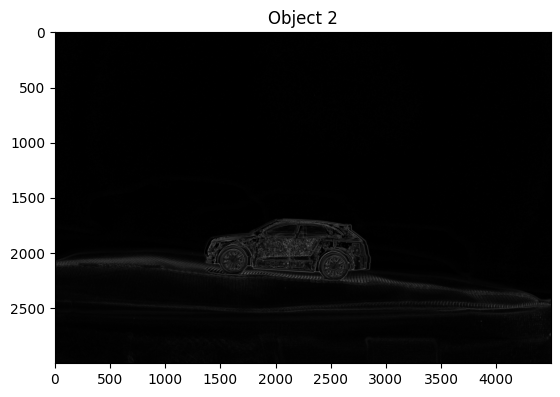

In [29]:
# TODO: Generate resulting edge map and overlay image. Render overlay image
# TODO: You should achieve contrast overlay layer depending on content of ambient image
# Expected output: 1 grayscale image in total

#edge_1 = generate_edge_map(gradient_1)#, '1', {'lower_bound' : 0.4, 'upper_bound' : 0.8})
edge_2 = generate_edge_map(gradient_2)#, '2', {'lower_bound' : 0.4, 'upper_bound' : 1.8})
#edge_3 = generate_edge_map(gradient_3)#, '3', {'lower_bound' : 0.1, 'upper_bound' : 0.7})


render_images({#'Object 1' : edge_1,
               'Object 2' : edge_2,
               #'Object 3' : edge_3},
                },bw=True)

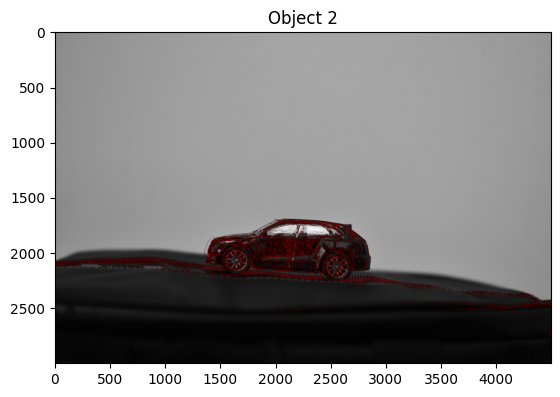

In [30]:
#overlay_1 = overlay_edge_map(images_1_bw, edge_1, color='red')
overlay_2 = overlay_edge_map(images_2_bw, edge_2, color='red')
#overlay_3 = overlay_edge_map(images_3_bw, edge_3, color='red')

render_images({#'Object 1' : overlay_1,
               'Object 2' : overlay_2,
               #'Object 3' : overlay_3
               })

In [31]:
import os
def depth_edge_detector(folder, color, sl=np.s_[:, :]):
    """Calulates edge map using developed pipeline and renders image with overlay
    of edge map rendered using selected color over ambient image

    Args:
        folder: path to folder with captured images
        color: color of overlay. Valid values are white, black, red, green, blue
        sl: slice to work with a region of the image (optional)
    """

    # TODO: Collect a depth edge detector pipeline by wrapping up developed functions into a single one
    # Notes:
    #   - Function should render all intermediate results of calculations (as separate functions did)

    capt_images_names = []
    for filename in os.listdir(folder):
        if 'bw' not in filename and os.path.isfile(os.path.join(folder, filename)):
            capt_images_names.append(os.path.splitext(filename)[0] + ".JPG")
    images = load_images(capt_images_names, render=False, path_to_images=folder)

    gray_images = convert_to_grayscale(images, save=True, path_to_save=folder)
    render_images(gray_images, bw=True)

    gray_images = load_images([name[:-4]+"_bw.jpg" for name in capt_images_names], render=False, path_to_images=folder)
    diff_with_ambient_images = substract_ambient(gray_images)
    render_images(diff_with_ambient_images, bw=True)

    max_intensity_image = get_max_intensity_image(gray_images)
    render_images({'Max intensity' : max_intensity_image}, bw=True)

    ratio_image = get_ratios(diff_with_ambient_images, max_intensity_image)
    render_images(ratio_image, bw=True)

    gradient = get_gradient(ratio_image, ['up', 'right', 'down', 'left'])

    edge = generate_edge_map(gradient, sl)
    render_images({'Object ' : edge}, bw=True)

    overlay = overlay_edge_map(gray_images, edge, color=color)
    render_images({'Object '  : overlay})

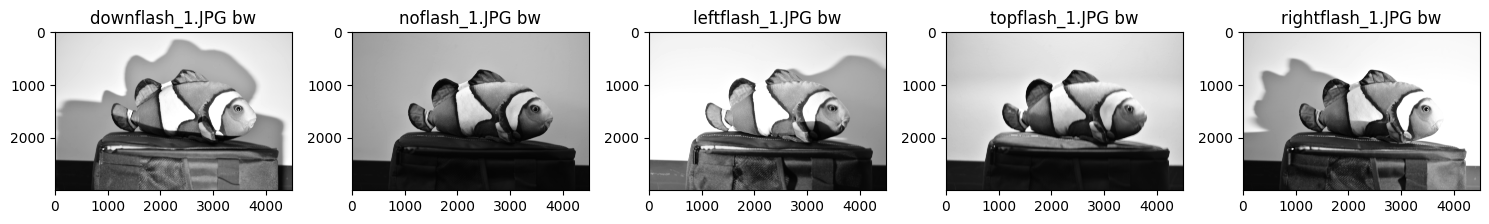

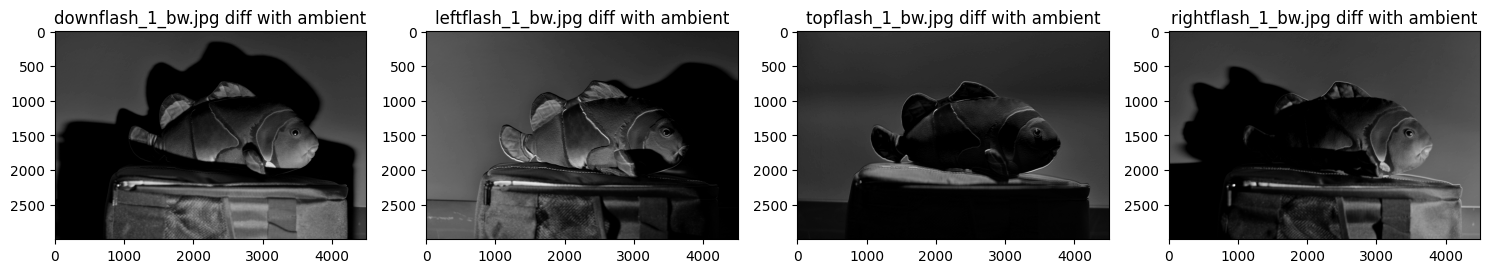

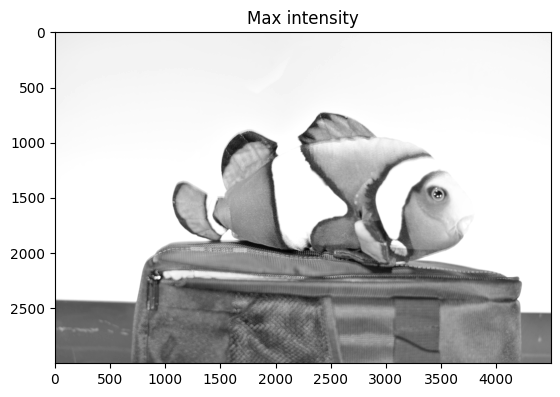

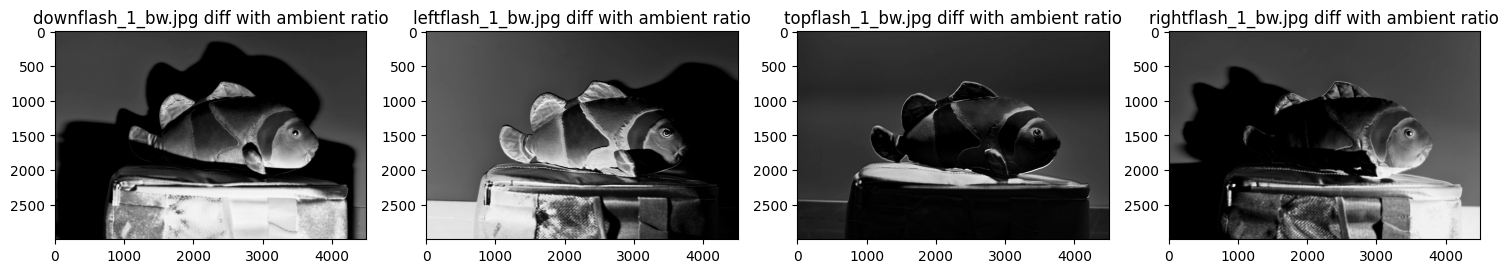

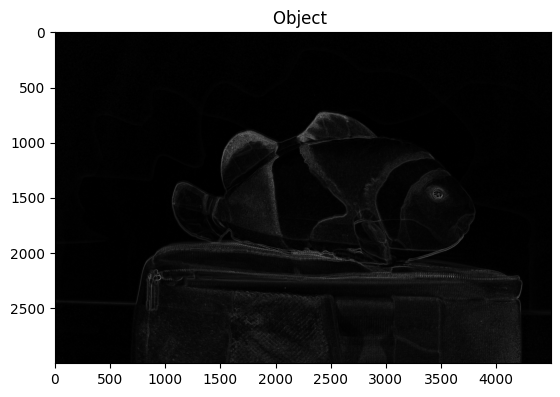

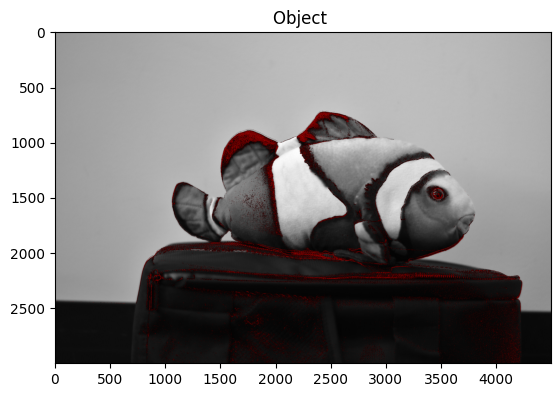

In [32]:
# TODO: For dataset #1 use developed depth edge detector pipeline to show resulting overlay and all intermediate results
# Expected output: 6 (5 + 1) color images and 19 (5 + 4 + 1 + 4 + 4 + 1) grayscale images in total

depth_edge_detector(path_to_images1, 'red')

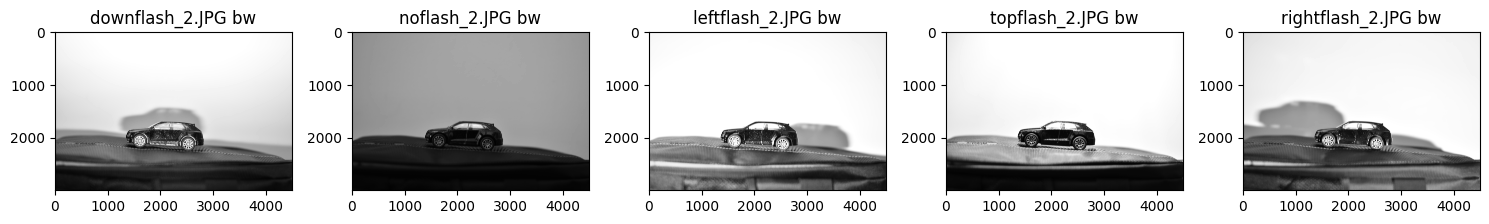

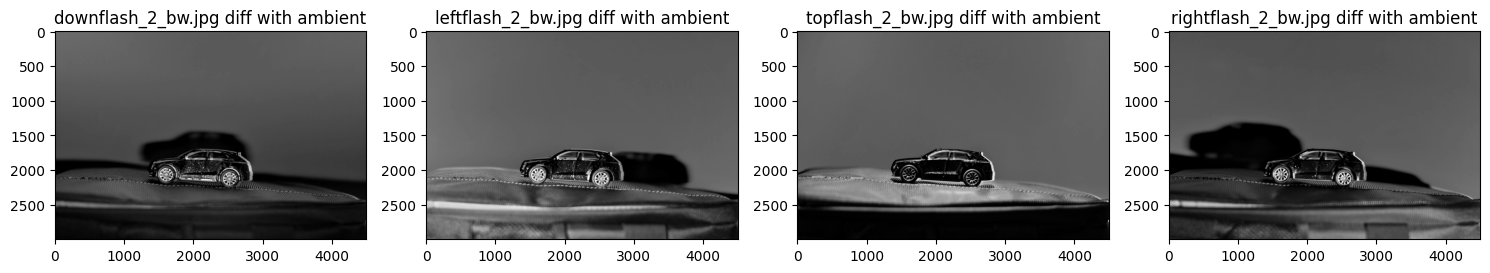

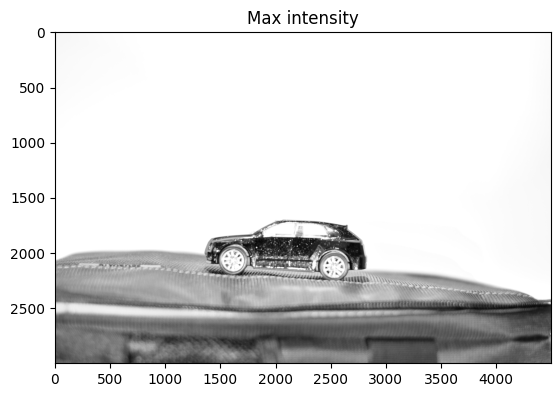

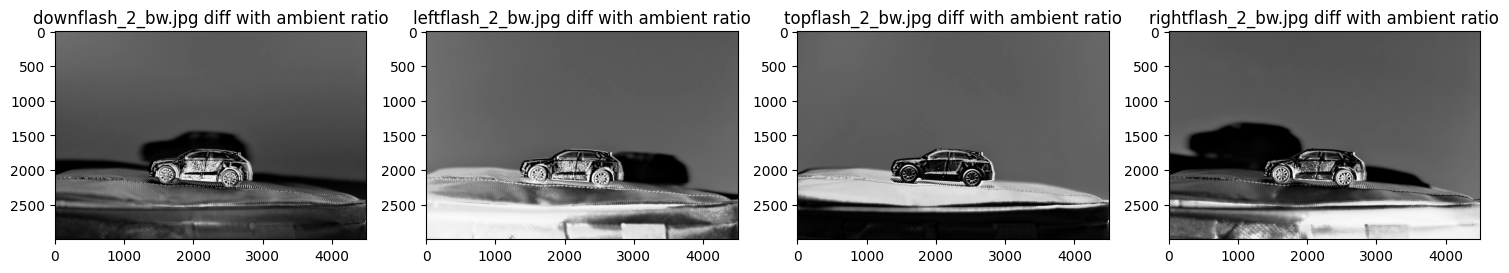

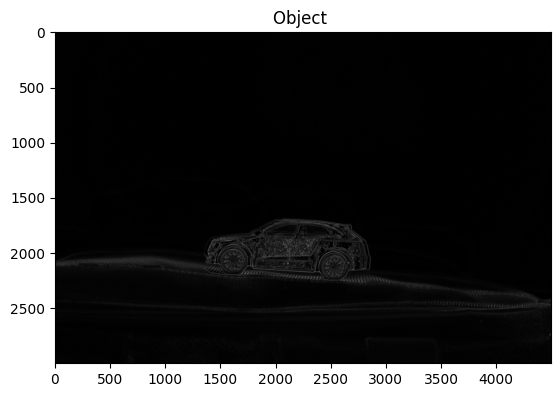

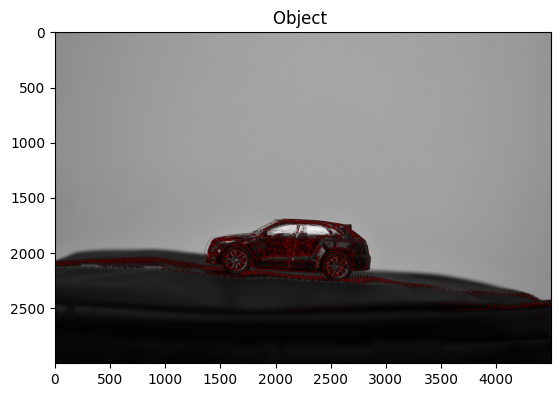

In [33]:
# TODO: For dataset #2 use developed depth edge detector pipeline to show resulting overlay and all intermediate results
# Expected output: 6 (5 + 1) color images and 19 (5 + 4 + 1 + 4 + 4 + 1) grayscale images in total

depth_edge_detector(path_to_images2, 'red')

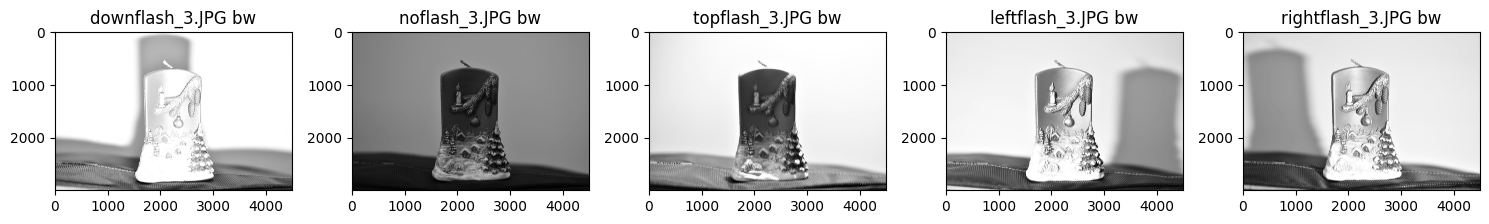

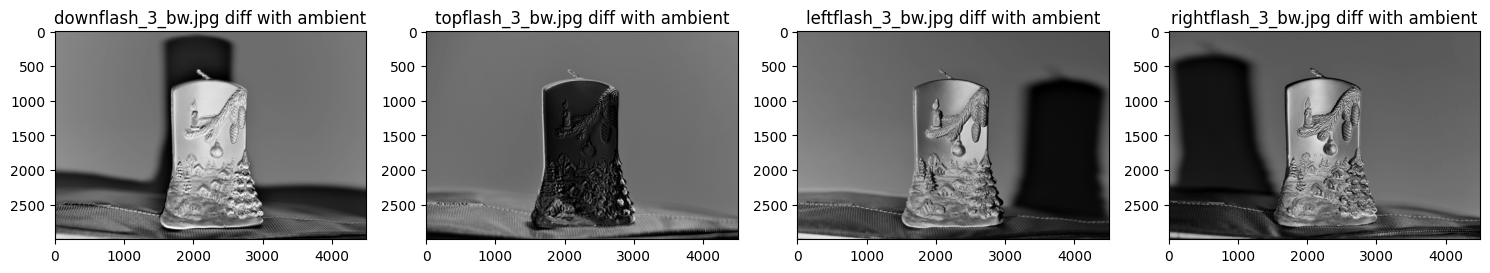

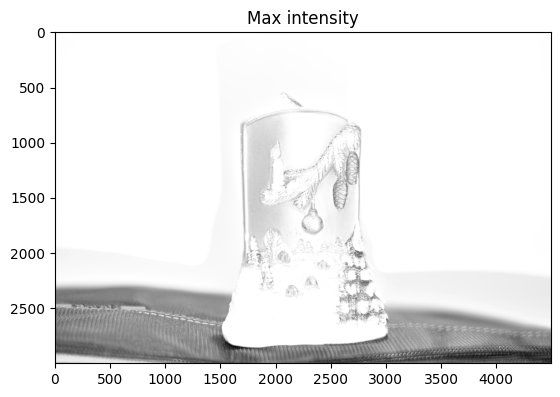

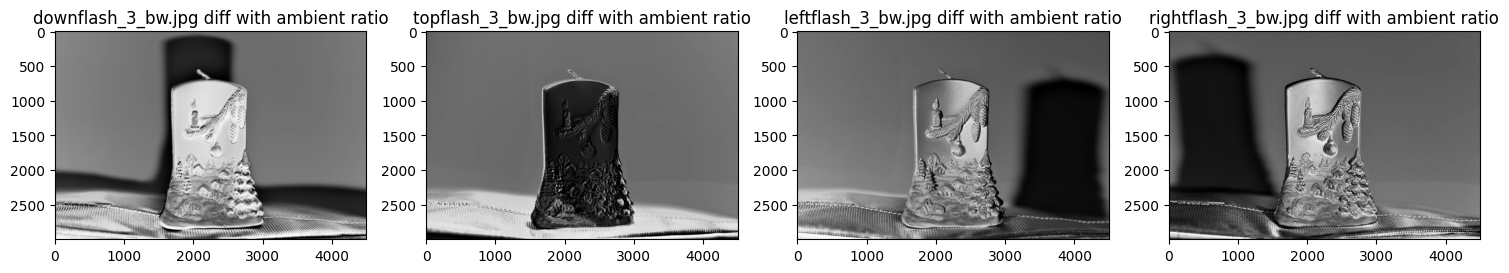

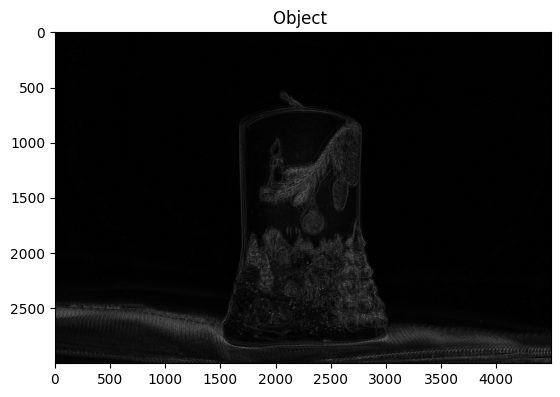

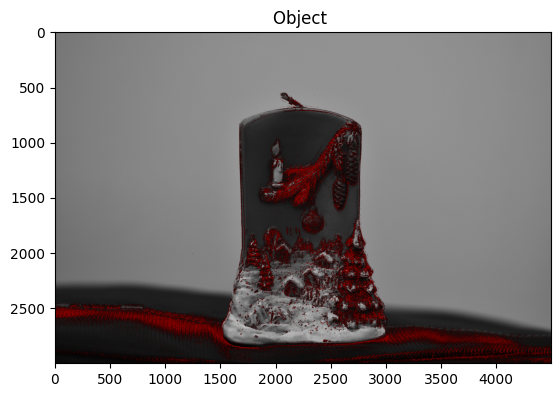

In [34]:
# TODO: For dataset #3 use developed depth edge detector pipeline to show resulting overlay and all intermediate results
# Expected output: 6 (5 + 1) color images and 19 (5 + 4 + 1 + 4 + 4 + 1) grayscale images in total
depth_edge_detector(path_to_images3, 'red')

### 1.3 Comparison with Canny edge detector

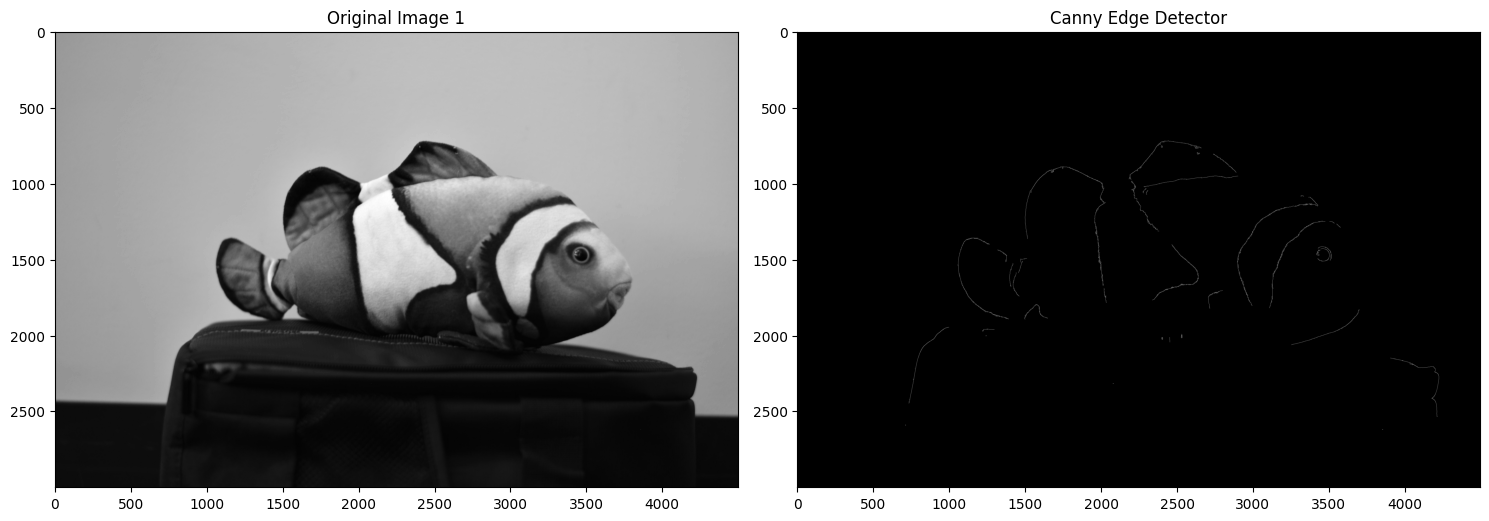

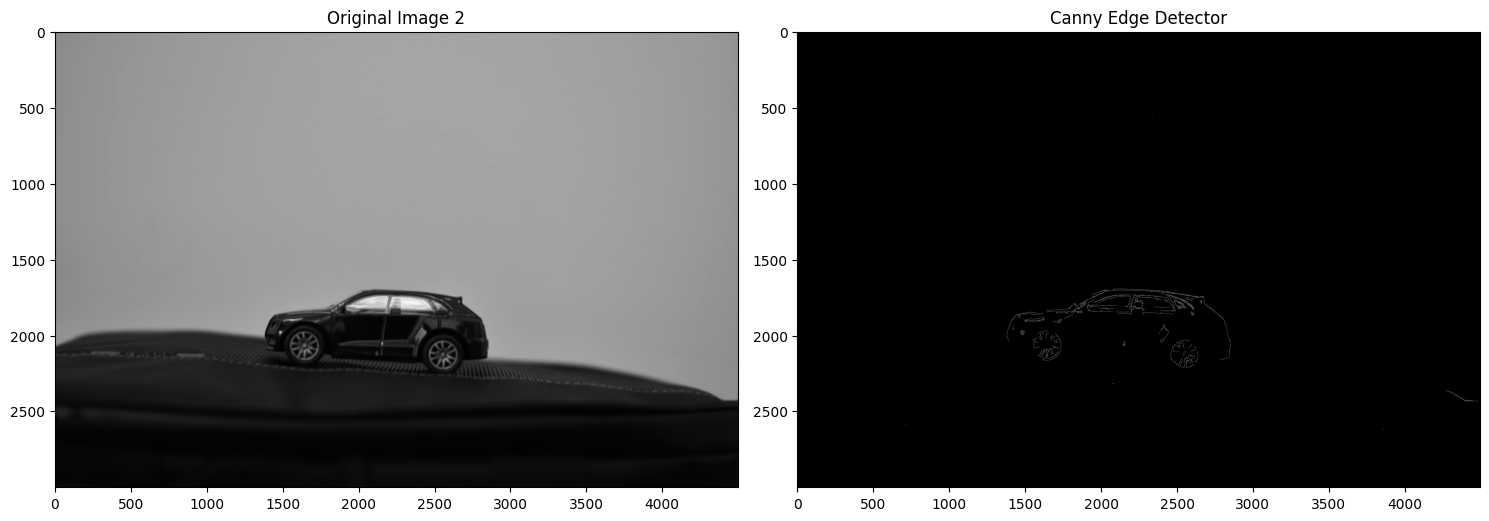

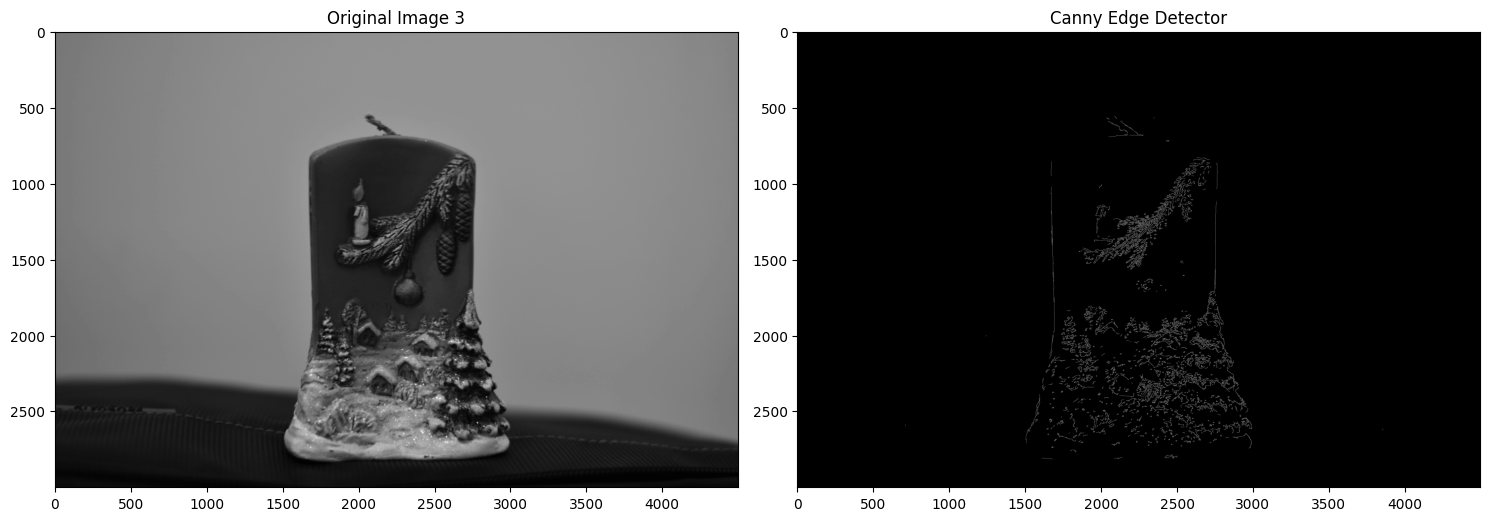

In [35]:
# TODO: Generate edge map by appliyng Canny edge detector to ambient image of each dataset

import cv2
import matplotlib.pyplot as plt
import os

noflash = [path_to_images1+'/noflash_1_bw.JPG', path_to_images2+'/noflash_2_bw.JPG', path_to_images3+'/noflash_3_bw.JPG']
noflash_images = load_images(noflash, render=False, path_to_images='')

lower_thresholds = [45, 45, 45]   
upper_thresholds = [120, 100, 100]  
canny_edges_list = []
for i, (name, img) in enumerate(noflash_images.items()):
    gray_image = img  

    canny_edges = cv2.Canny(gray_image, lower_thresholds[i], upper_thresholds[i])
    canny_edges_list.append(canny_edges)
    render_images({
        f'Original Image {i + 1}': gray_image,
        'Canny Edge Detector': canny_edges,
    }, bw=True)

With Canny filter the unneeded white dots appearing in the background

It's cleary visible with higher structure and contrast options 

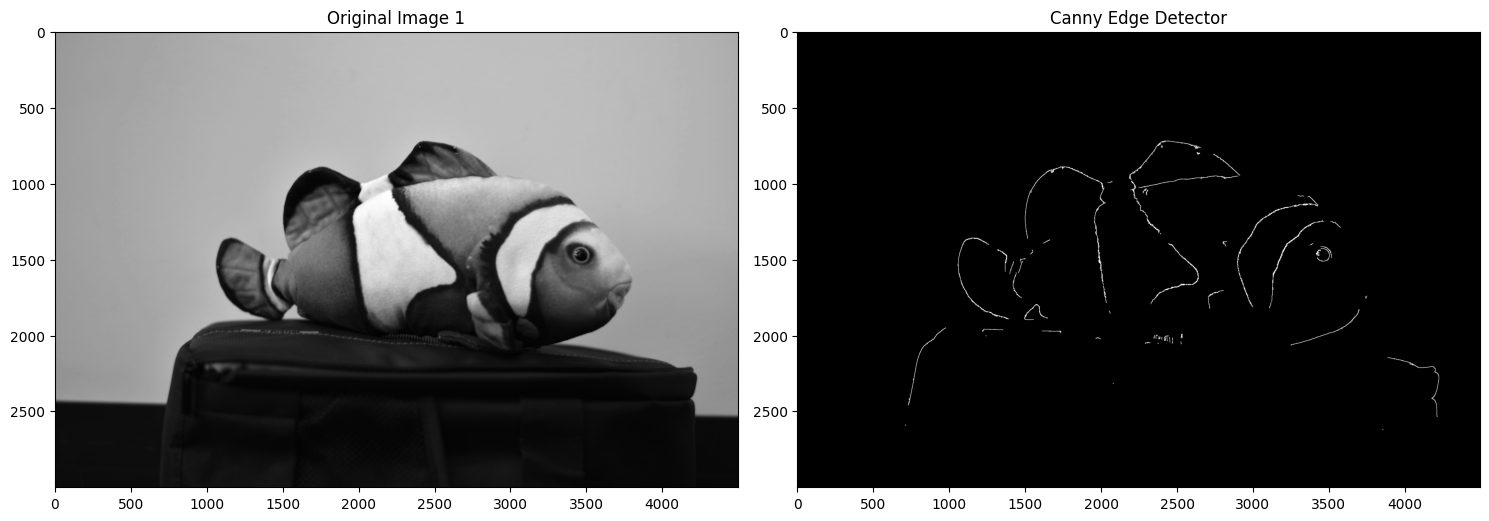

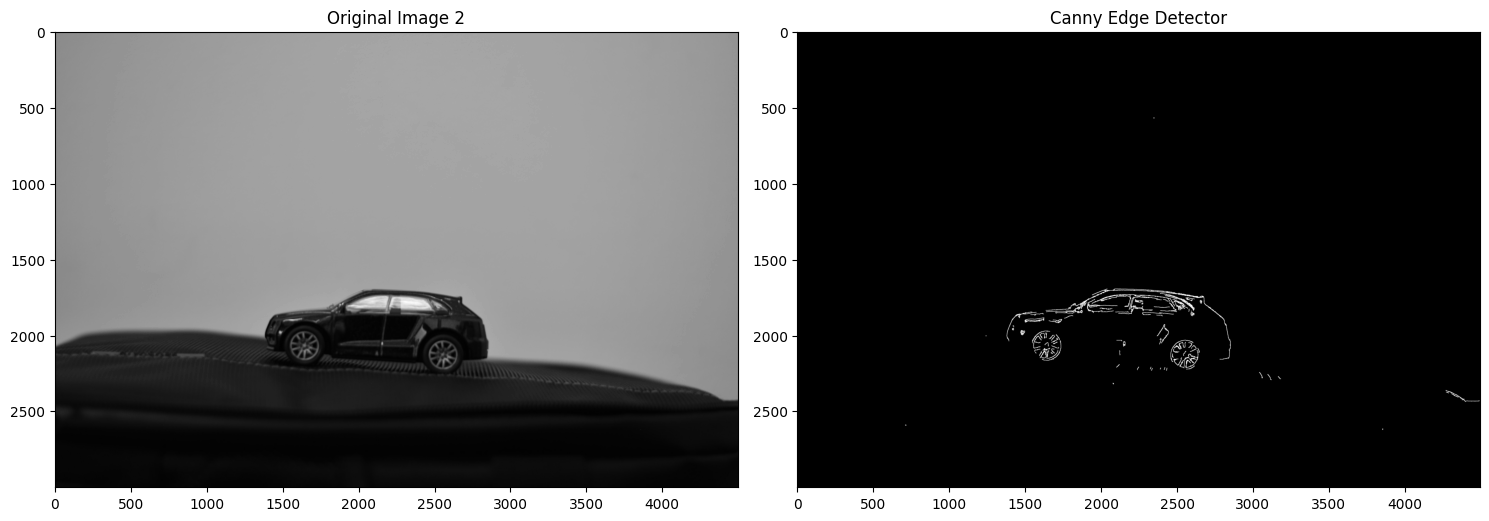

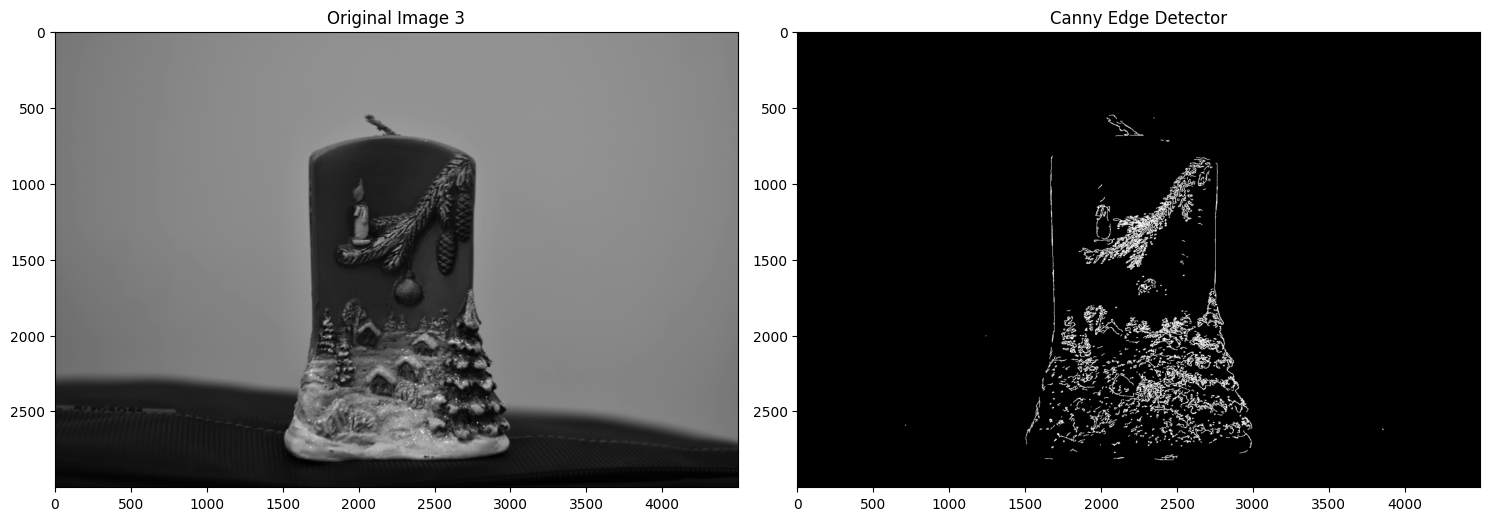

In [36]:
import cv2
import matplotlib.pyplot as plt
import os

noflash = [path_to_images1+'/noflash_1_bw.JPG', path_to_images2+'/noflash_2_bw.JPG', path_to_images3+'/noflash_3_bw.JPG']
noflash_images = load_images(noflash, render=False, path_to_images='')

lower_thresholds = [45, 45, 45]   
upper_thresholds = [120, 100, 100]

canny_edges_structured_list = []
for i, (name, img) in enumerate(noflash_images.items()):
    gray_image = img  
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if gray_image.dtype != 'uint8':
        gray_image = gray_image.astype('uint8')
    clahe = cv2.createCLAHE(clipLimit=0.3, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)

    canny_edges = cv2.Canny(enhanced_image, lower_thresholds[i], upper_thresholds[i])

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
    dilated_edges = cv2.dilate(canny_edges, kernel)

    canny_edges_structured_list.append(dilated_edges)
    render_images({
        f'Original Image {i + 1}': gray_image,
        'Canny Edge Detector': dilated_edges,
    }, bw=True)

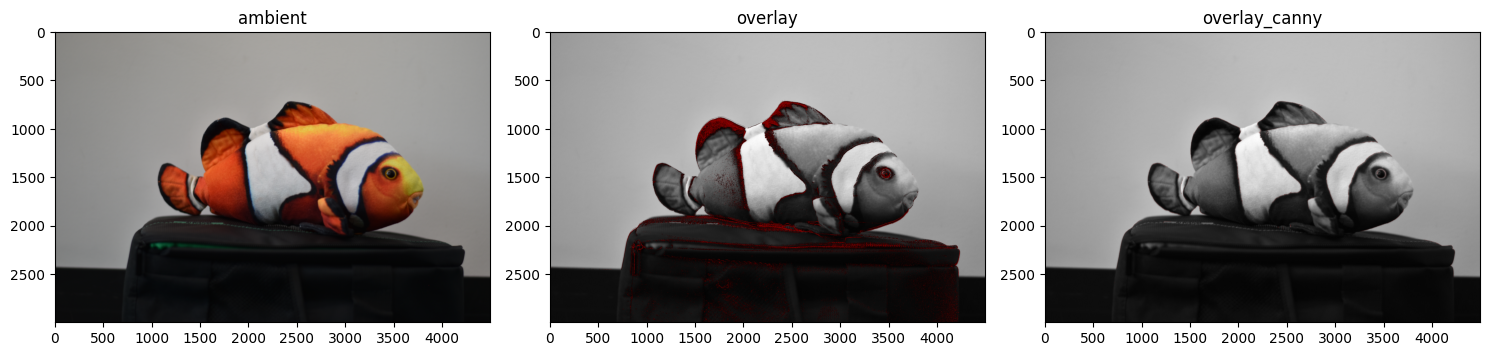

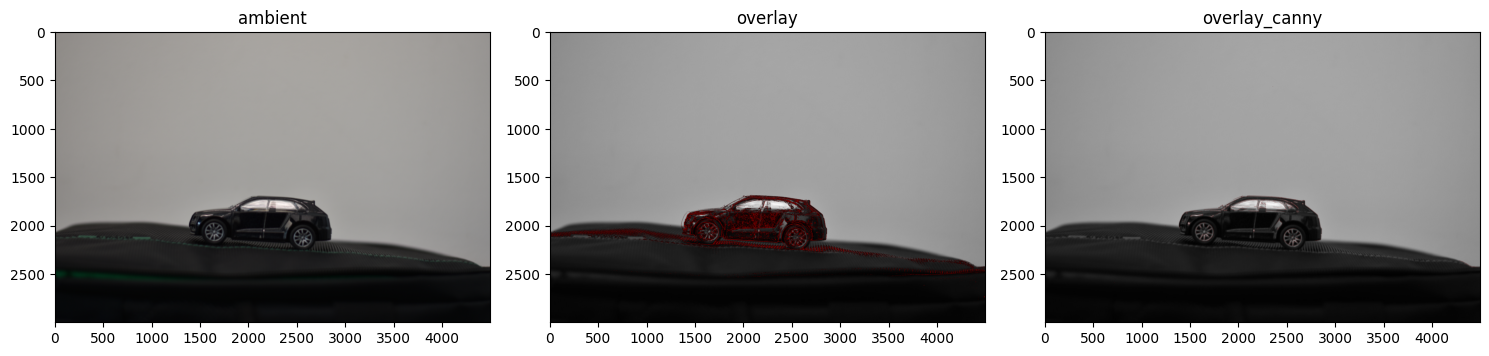

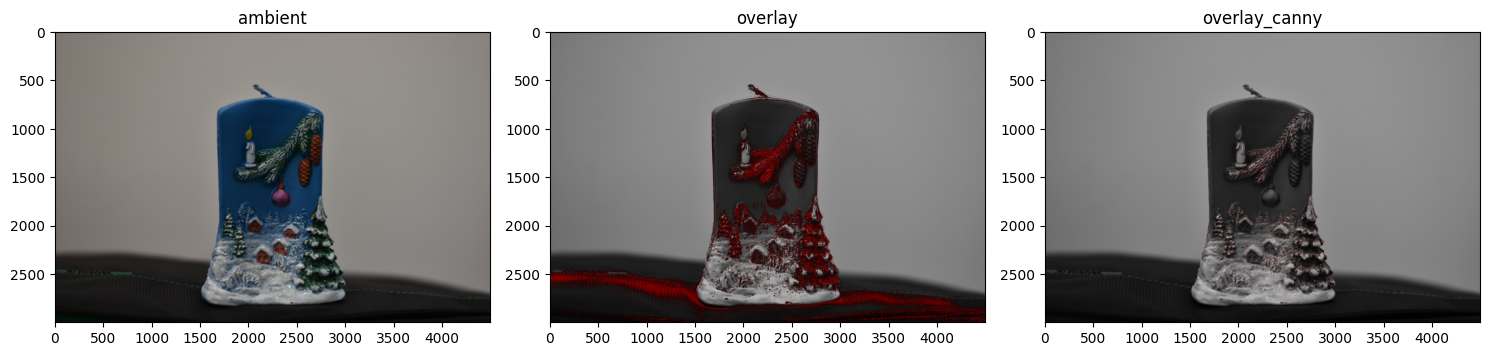

In [37]:
# TODO: Render original ambient image, overlay image based on developed depth edge detector, and overlay image based on Canny edge detector for each dataset
# Expected output: 3 color images per dataset, 3 datasets in total
i=0
for folder in [path_to_images1, path_to_images2, path_to_images3]:
    result_to_render = {}

    capt_images_names = []
    for filename in os.listdir(folder):
        if 'bw' not in filename and os.path.isfile(os.path.join(folder, filename)):
            capt_images_names.append(os.path.splitext(filename)[0] + ".JPG")
    images = load_images(capt_images_names, render=False, path_to_images=folder)
    ambient_img = {"ambient":find_ambient(images)}
    ambient_img_bw = {"ambient bw":rgb_to_gray(ambient_img["ambient"])}

    result_to_render["ambient"] = ambient_img["ambient"] 
    #render_images(ambient_img)


    gray_images = load_images([name[:-4]+"_bw.jpg" for name in capt_images_names], render=False, path_to_images=folder)
    diff_with_ambient_images = substract_ambient(gray_images)
    max_intensity_image = get_max_intensity_image(gray_images)
    ratio_image = get_ratios(diff_with_ambient_images, max_intensity_image)
    gradient = get_gradient(ratio_image, ['up', 'right', 'down', 'left'])
    edge = generate_edge_map(gradient)

    overlay = overlay_edge_map(gray_images, edge, color="red")
    result_to_render["overlay"] = overlay
    #render_images({"overlay": overlay})

    ambient_img_bw["ambient bw"] = (ambient_img_bw["ambient bw"] * 255).astype('uint8')
    overlay_canny = overlay_edge_map(gray_images, canny_edges_list[i], color="red")
    i+=1
    result_to_render["overlay_canny"] = overlay_canny
    #render_images({"overlay_canny": overlay_canny})
    render_images(result_to_render)
    
    


With structured Canny

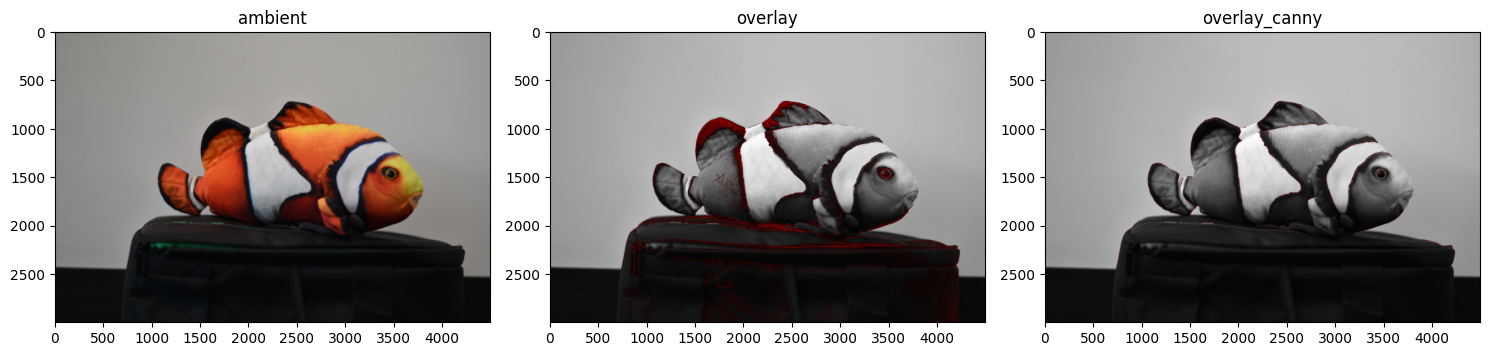

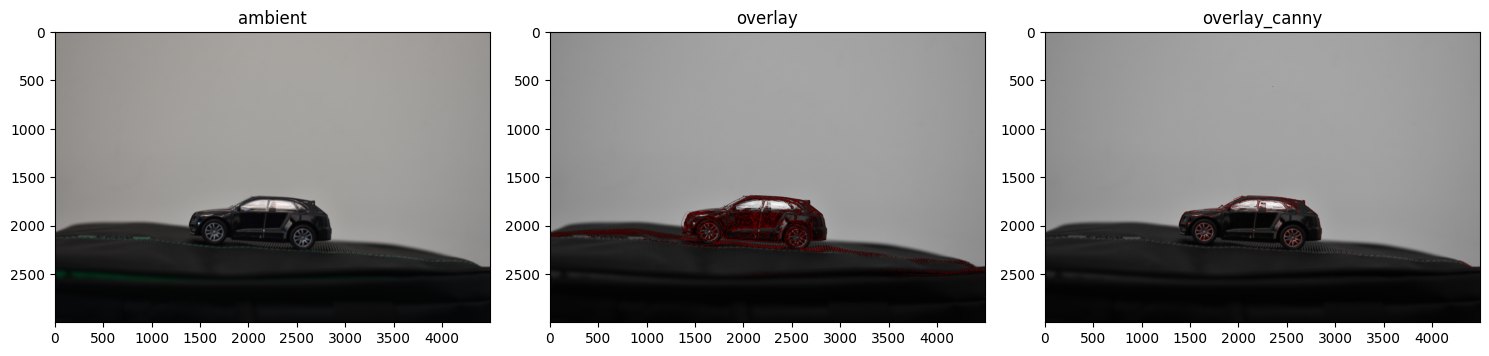

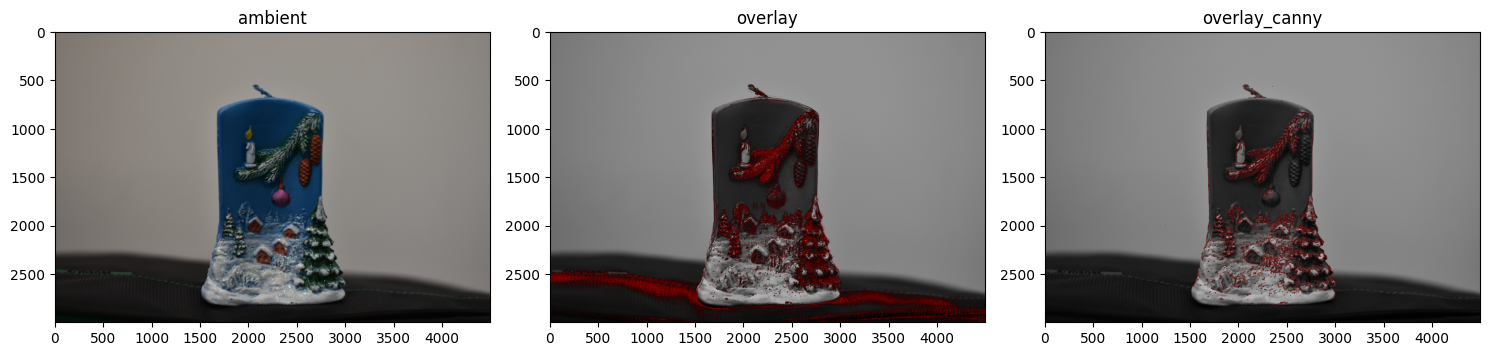

In [38]:
# TODO: Render original ambient image, overlay image based on developed depth edge detector, and overlay image based on Canny edge detector for each dataset
# Expected output: 3 color images per dataset, 3 datasets in total
i=0
for folder in [path_to_images1, path_to_images2, path_to_images3]:
    result_to_render = {}

    capt_images_names = []
    for filename in os.listdir(folder):
        if 'bw' not in filename and os.path.isfile(os.path.join(folder, filename)):
            capt_images_names.append(os.path.splitext(filename)[0] + ".JPG")
    images = load_images(capt_images_names, render=False, path_to_images=folder)
    ambient_img = {"ambient":find_ambient(images)}
    ambient_img_bw = {"ambient bw":rgb_to_gray(ambient_img["ambient"])}

    result_to_render["ambient"] = ambient_img["ambient"] 
    #render_images(ambient_img)


    gray_images = load_images([name[:-4]+"_bw.jpg" for name in capt_images_names], render=False, path_to_images=folder)
    diff_with_ambient_images = substract_ambient(gray_images)
    max_intensity_image = get_max_intensity_image(gray_images)
    ratio_image = get_ratios(diff_with_ambient_images, max_intensity_image)
    gradient = get_gradient(ratio_image, ['up', 'right', 'down', 'left'])
    edge = generate_edge_map(gradient)

    overlay = overlay_edge_map(gray_images, edge, color="red")
    result_to_render["overlay"] = overlay
    #render_images({"overlay": overlay})

    ambient_img_bw["ambient bw"] = (ambient_img_bw["ambient bw"] * 255).astype('uint8')
    overlay_canny = overlay_edge_map(gray_images, canny_edges_structured_list[i], color="red")
    i+=1
    result_to_render["overlay_canny"] = overlay_canny
    #render_images({"overlay_canny": overlay_canny})
    render_images(result_to_render)
    
    


*`TODO:`* Describe what are the differences between results of developed depth edge detector and Canny edge detector. 
Explain what the possible reasons are for the observed differences.

#### possible reasons

* The depth edge detector captures more edges than the Canny edge detector because it uses multiple images with different lighting, focusing on depth discontinuities by analyzing shadows.

* Canny only works on one image and cannot differentiate between texture and depth edges. 

The difference arises because the depth detector gathers 3D structure information from multiple shadow directions, while Canny uses intensity changes from a single image.

#### observed differences 

* With the help of our filter, it was possible to achieve greater detail of objects. The reason for this, as mentioned earlier, is the use of 3 images with different angles of incidence of light, allowing you to identify "irregularities" on the model. 

* Comparing the models, we can conclude that the Canny filter is easier to use, but skips a number of "details" on each object. 

* However, the pre-built Canny filter did not pick up noise from the background, while our solution was only able to do so on cropped images with manually removed backgrounds  